In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [2]:
#df = pd.read_csv('data_1.csv')
df = pd.read_csv('data_2.csv')
#df = pd.read_csv('data_3.csv')

In [3]:
# Turning a dataframe into a NumPy array
X = np.array(df[['x1', 'x2']])
y = np.array(df['y'])
y = y.astype(np.integer)

## Decision Boundries 

In [4]:
# Logistic Regression
clf1 = LogisticRegression(solver='lbfgs')
clf1.fit(X,y);

In [5]:
# Neural Networks
clf2 = MLPClassifier()
clf2.fit(X,y);

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
# Decision Trees
clf3 = DecisionTreeClassifier()
clf3.fit(X,y);

In [7]:
# Support Vector Machines
clf4 = SVC(kernel='rbf', gamma=1000)
clf4.fit(X,y);

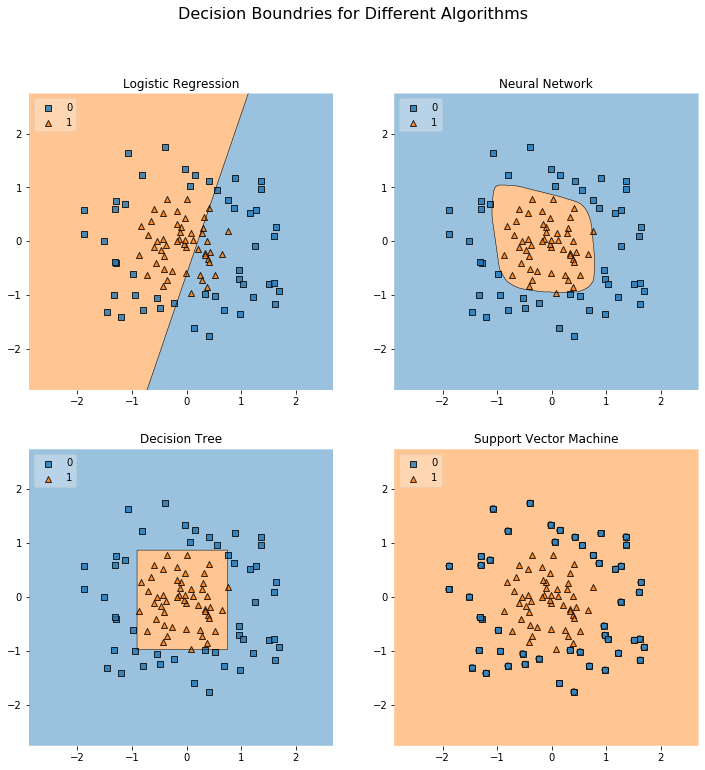

In [8]:
plt.subplots(2,2,figsize=(12,12))

plt.subplot(2, 2, 1)
plt.title('Logistic Regression')
plot_decision_regions(X, y, clf=clf1, legend=2)

plt.subplot(2, 2, 2)
plt.title('Neural Network')
plot_decision_regions(X, y, clf=clf2, legend=2)

plt.subplot(2, 2, 3)
plt.title('Decision Tree')
plot_decision_regions(X, y, clf=clf3, legend=2)

plt.subplot(2, 2, 4)
plt.title('Support Vector Machine')
plot_decision_regions(X, y, clf=clf4, legend=2)

plt.suptitle('Decision Boundries for Different Algorithms', size=16) 
plt.show()

***
## Grid Search

In [9]:
# Select the parameters:
parameters = {'kernel':['poly', 'rbf'], 'C':[1, 10]}

# Create a scorer
scorer = make_scorer(f1_score)

# Classifier
clf = SVC(gamma='auto')

# Create a GridSearch Object with the parameters, and the scorer
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the data
grid_fit = grid_obj.fit(X, y)

# Get the best estimator.
best_clf = grid_fit.best_estimator_
print(best_clf)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
